In [148]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df_train = pd.read_csv(r'C:\Users\User\Desktop\ames_train.csv')
df_test = pd.read_csv(r'C:\Users\User\Desktop\ames_test.csv')

In [37]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


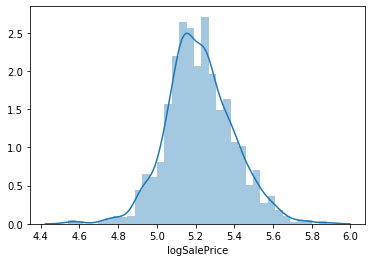

In [38]:
import numpy as np
df_train['logSalePrice'] = np.log10(df_train['SalePrice']); #Sale price heavy right tail, log gave the data set a more norm dist
sns.distplot(df_train['logSalePrice'])

,LotFrontage,YearBuilt,logSalePrice,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF
LotFrontage,1.000000,0.123349,0.355878,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469
YearBuilt,0.123349,1.000000,0.586570,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784
logSalePrice,0.355878,0.586570,1.000000,0.372023,0.004832,0.221985,0.612134,0.596981,0.319300,-0.037963
BsmtFinSF1,0.233633,0.249503,0.372023,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503
BsmtFinSF2,0.049900,-0.049107,0.004832,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807
BsmtUnfSF,0.132644,0.149040,0.221985,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167
TotalBsmtSF,0.392075,0.391452,0.612134,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245
1stFlrSF,0.457181,0.281986,0.596981,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241
2ndFlrSF,0.080177,0.010308,0.319300,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353
LowQualFinSF,0.038469,-0.183784,-0.037963,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000


C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


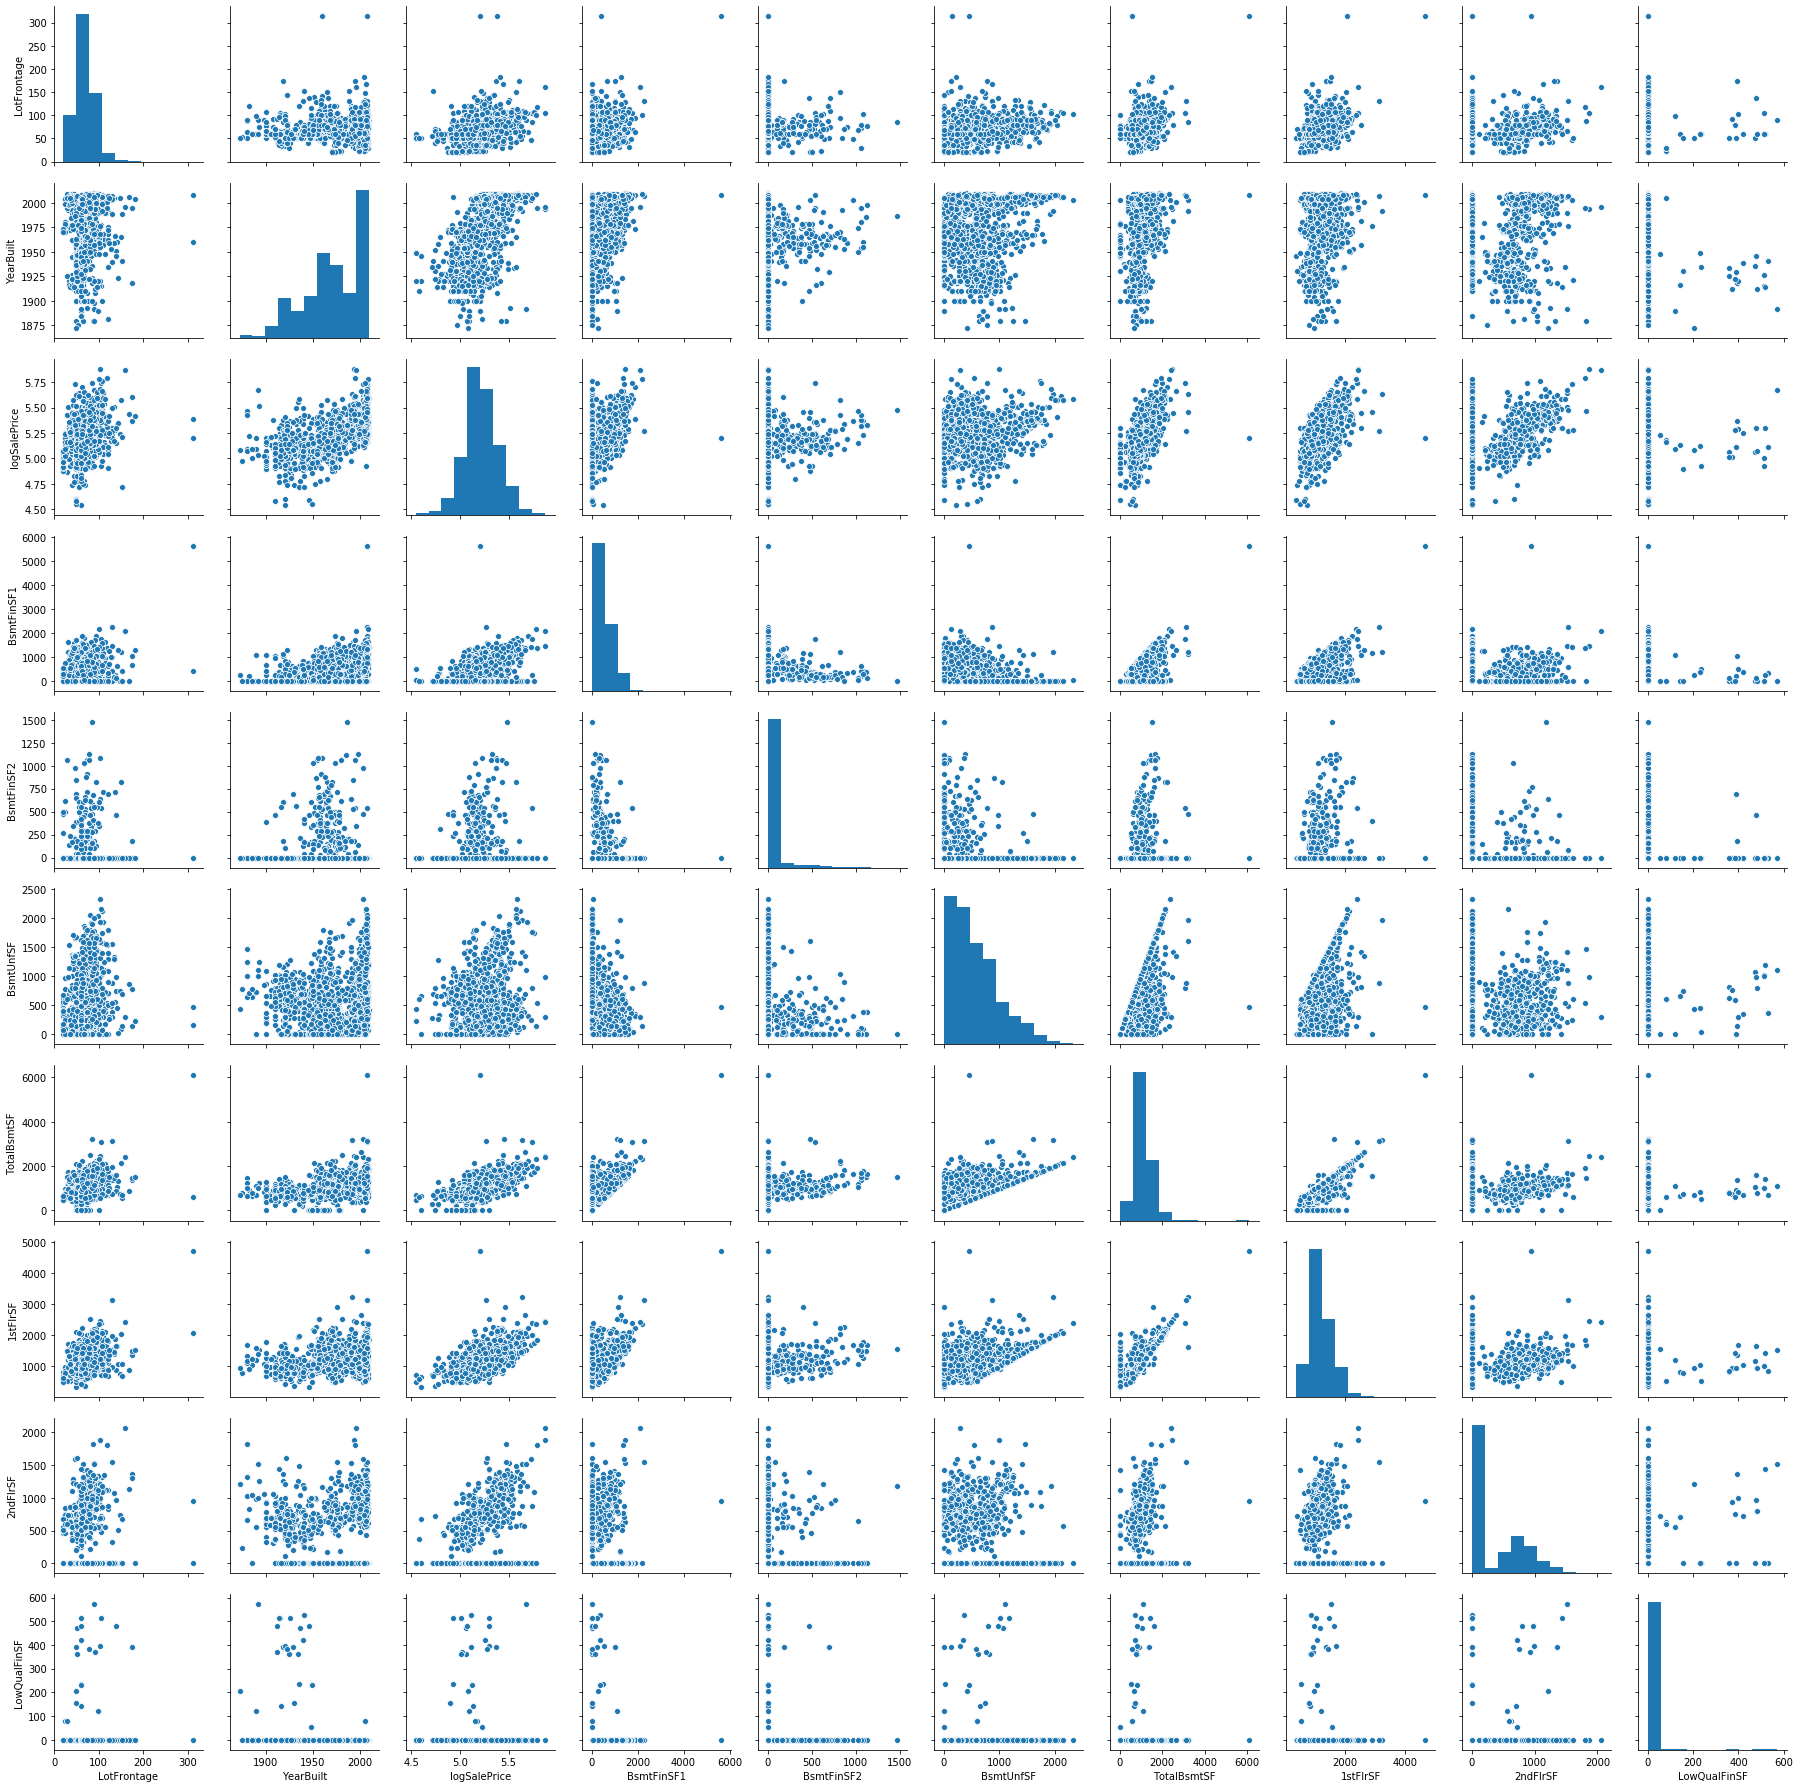

In [45]:

display(df_train[["LotFrontage","YearBuilt","logSalePrice","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
                       "TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF"]].corr(method='pearson'));


display(sns.pairplot(df_train[["LotFrontage","YearBuilt","logSalePrice","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
                       "TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF"]]));



,logSalePrice,PoolArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,TotalSF,OverallQual,OverallCond
logSalePrice,1.000000,0.069798,0.209044,-0.147548,0.534422,0.777296,0.817184,-0.036868
PoolArea,0.069798,1.000000,0.070703,-0.014525,0.083757,0.172466,0.065166,-0.001985
BedroomAbvGr,0.209044,0.070703,1.000000,0.198597,0.676620,0.354034,0.101676,0.012980
KitchenAbvGr,-0.147548,-0.014525,0.198597,1.000000,0.256045,0.026759,-0.183882,-0.087001
TotRmsAbvGrd,0.534422,0.083757,0.676620,0.256045,1.000000,0.672596,0.427452,-0.057583
TotalSF,0.777296,0.172466,0.354034,0.026759,0.672596,1.000000,0.668155,-0.143814
OverallQual,0.817184,0.065166,0.101676,-0.183882,0.427452,0.668155,1.000000,-0.091932
OverallCond,-0.036868,-0.001985,0.012980,-0.087001,-0.057583,-0.143814,-0.091932,1.000000


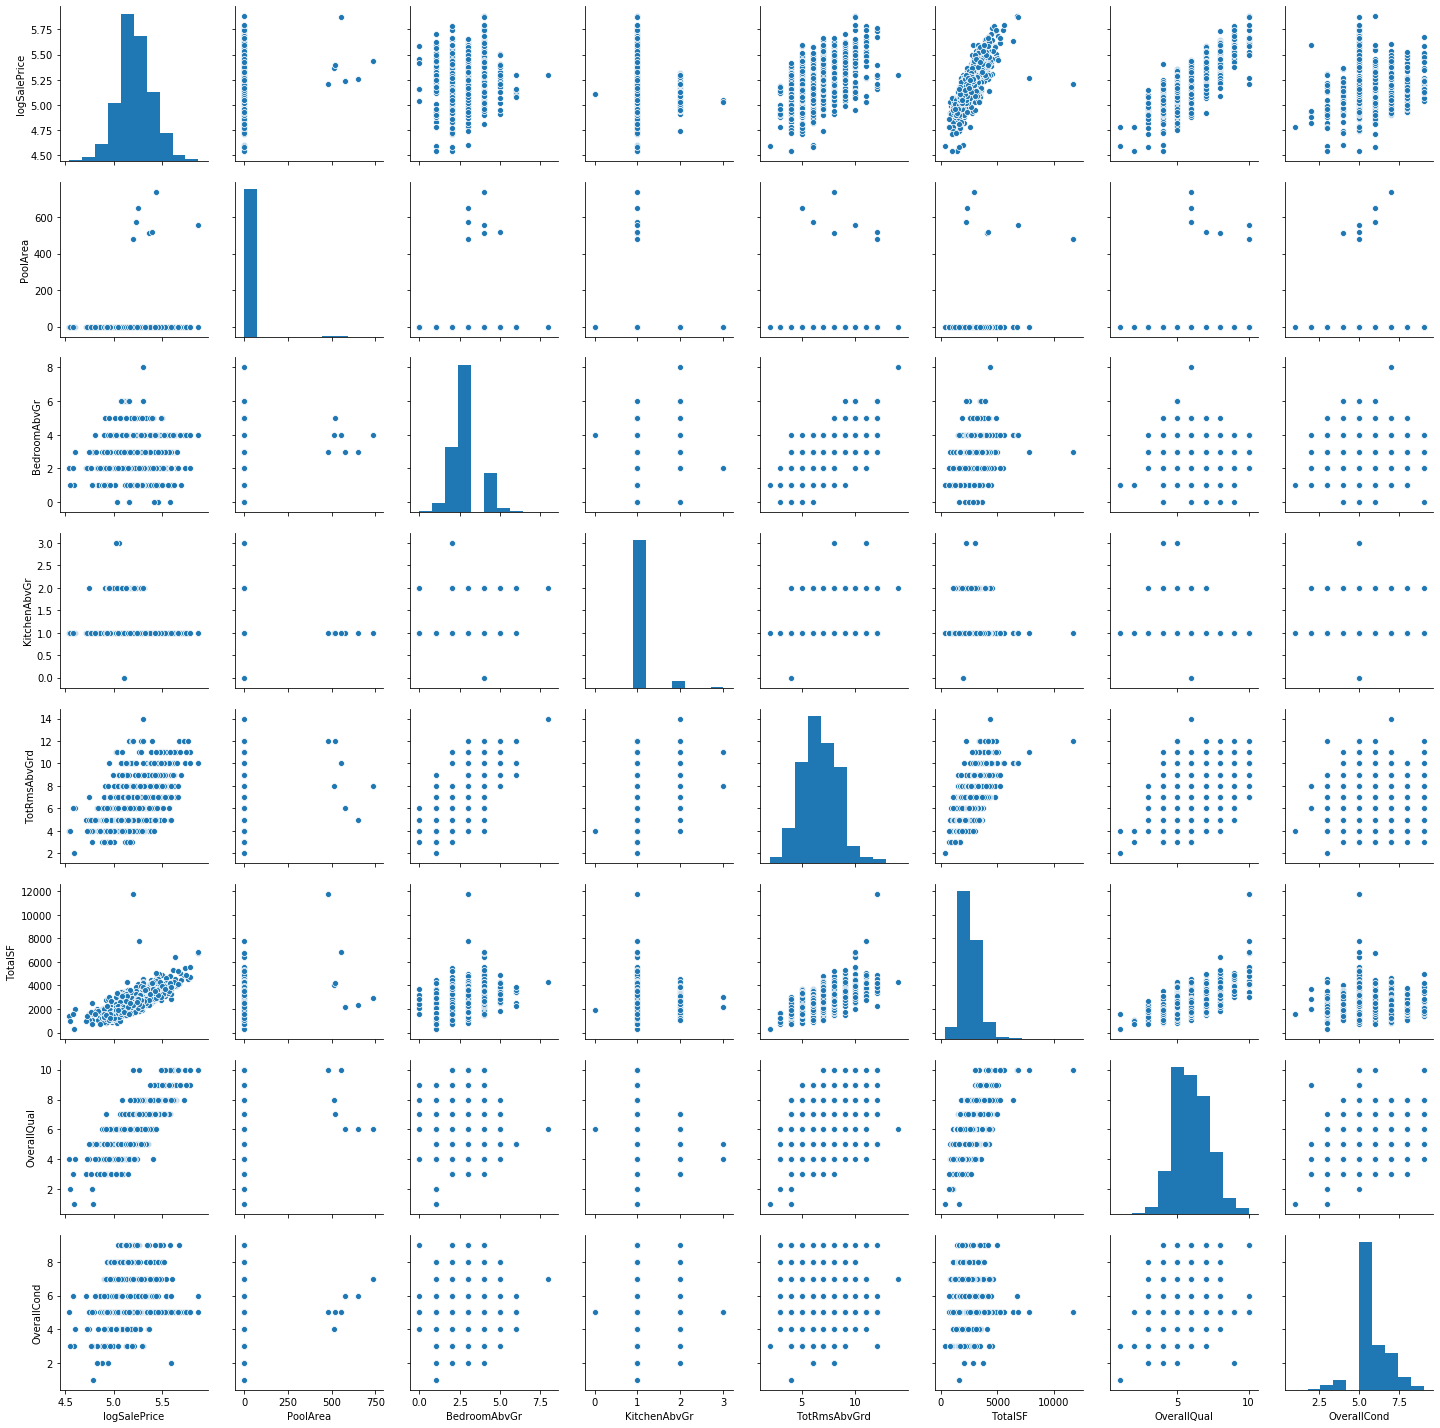

In [44]:
# Noticed SF Measures are correlated to logSalesPrice
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']


display(df_train[["logSalePrice","PoolArea","BedroomAbvGr","KitchenAbvGr",
                       "TotRmsAbvGrd","TotalSF","OverallQual","OverallCond","BldgType"]].corr(method='pearson'));

display(sns.pairplot(df_train[["logSalePrice","PoolArea","BedroomAbvGr","KitchenAbvGr",
                       "TotRmsAbvGrd","TotalSF","OverallQual","OverallCond","BldgType"]]));



In [121]:
#Check for multicollinearity
#Split Train data into train and test to see how Linear vs Lasso vs Ridge vs Elastic net perform
#Check for normal distrubuted residuals

#X = df_train[['TotalSF','PoolArea','OverallQual']]

X = df_train['TotalSF']
y = df_train['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [122]:
linReg = LinearRegression().fit(X_train.values.reshape(-1,1),y_train.values)
linReg.score(X_train.values.reshape(-1,1),y_train.values)
linReg.get_params()
display(10**linReg.coef_)
display(10**linReg.intercept_)


array([1.00044795])

53135.08808493488

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


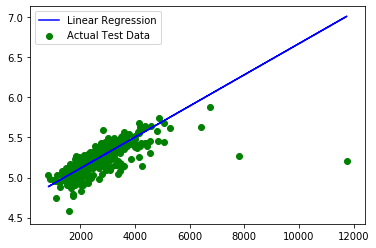

In [123]:
# Use Model to Predict on Test data

prediction = linReg.predict(X_test.values.reshape(-1,1))

#Visuals only for Linear Regression

#Plot line against actual test data
plt.plot(X_test,prediction, label='Linear Regression', color='b')
plt.scatter(X_test,y_test, label='Actual Test Data', color='g')
plt.legend()
plt.show()


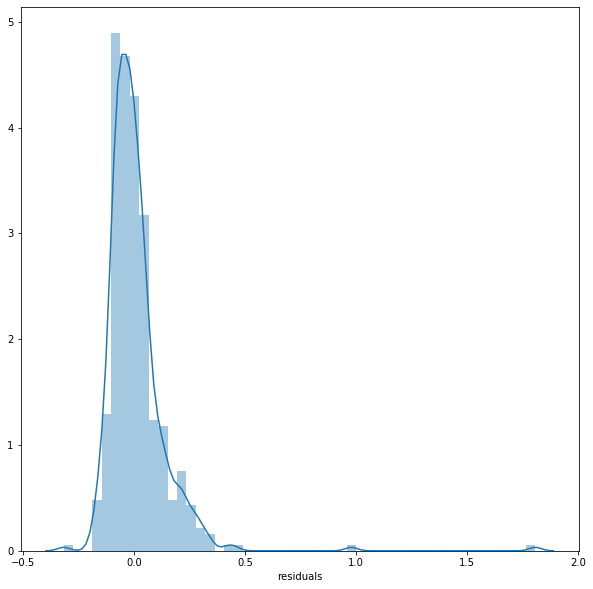

In [124]:
# Get and Plot residuals

df1 = pd.DataFrame(prediction)
df1.columns = ['predict']
df2 = pd.DataFrame(np.array(y_test))
df2.columns = ['actual']
df3 = pd.merge(df1,df2,left_index= True, right_index= True)
df3['residuals'] = df3['predict'] - df3['actual']


plt.figure(figsize=(10,10))
sns.distplot(df3['residuals'])


In [157]:
display(linReg.score(X_train.values.reshape(-1,1),y_train.values))
display(linReg.score(X_test.values.reshape(-1,1),y_test.values))

0.6957756120025038

0.30880454456037043

In [177]:
lassReg = Lasso(alpha=50,max_iter=100,tol=0.1)
lassReg = lassReg.fit(X_train.values.reshape(-1,1),y_train)

display(lassReg.score(X_train.values.reshape(-1,1),y_train.values))
display(lassReg.score(X_test.values.reshape(-1,1),y_test.values))

0.548739628797839

0.4696247555447587

In [172]:
ridgeReg = Ridge(alpha=1.0)
ridgeReg = ridgeReg.fit(X_train.values.reshape(-1,1),y_train)

display(ridgeReg.score(X_train.values.reshape(-1,1),y_train.values))
display(ridgeReg.score(X_test.values.reshape(-1,1),y_test.values))

0.6957756120025039

0.3088045461590039

In [164]:
scoresLR = cross_val_score(linReg,X.values.reshape(-1,1),y,cv=4, scoring = 'r2')
scoresLR

array([0.68145866, 0.62818001, 0.65028657, 0.37995916])

In [165]:
scoresLaR = cross_val_score(lassReg,X.values.reshape(-1,1),y,cv=4,scoring = 'r2')
scoresLaR

array([0.49711098, 0.45901616, 0.48691711, 0.45486559])

In [166]:
scoresRR = cross_val_score(ridgeReg,X.values.reshape(-1,1),y,cv=4,scoring = 'r2')
scoresRR

array([0.68145866, 0.62818001, 0.65028657, 0.37995916])

In [167]:
print("Accuracy: %0.2f (+/- %0.2f)"%(scoresLR.mean(), scoresLR.std() *2)) 

Accuracy: 0.58 (+/- 0.24)


In [168]:
print("Accuracy: %0.2f (+/- %0.2f)"%(scoresLaR.mean(), scoresLaR.std() *2)) 

Accuracy: 0.47 (+/- 0.04)


In [169]:
print("Accuracy: %0.2f (+/- %0.2f)"%(scoresRR.mean(), scoresRR.std() *2)) 

Accuracy: 0.58 (+/- 0.24)
